# Planejamento da solução (IOT)

# Input - Entrada 

## O problema de negócio

 1. Criar um plano de estratégia para adquirir imóveis em ótimas localizações com preços baixos e atrativos para revender à preços mais altos; lucrando mais, maximizando a sua receita..

# Output - Saída

Modelo de Análise para escolha de imóveis com caraterísticas que viabilizem melhor resultado na aquisição re revenda.

1.0. Construção da análise estatística; construção de gráficos para melhor interpretaçaõ  e visualição.

2.0. Painel de análise

Input: https://www.kaggle.com/harlfoxem/housesalesprediction;

Output: Construção da análise em python;


This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

It's a great dataset for evaluating simple regression models

*- Compreensão do negócio e variáveis envolvidas (mapa mental).


# Imports

In [1]:
# data manipulation
import pandas as pd
import numpy  as np 

import inflection
import math
import datetime

# EDA
import seaborn           as sns
import matplotlib.pyplot as plt

# Algorithms
import xgboost as xgb
import random
import warnings
warnings.filterwarnings ('ignore')

from scipy                import stats  as ss 
from IPython.core.display import HTML
from IPython.display      import Image


## Helper Functions

In [2]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    sns.set()
jupyter_settings()

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## Loading Data

In [3]:
pwd

'/home/ehgeraldo/repos/Houses_Sales_Prediction/notebook'

In [4]:
ls -l

total 14880
-rw-rw-r-- 1 ehgeraldo ehgeraldo  108802 feb  6 10:47  c0.0-ehgeraldo-planning.ipynb
-rw-rw-r-- 1 ehgeraldo ehgeraldo  257087 feb  6 11:12 'c1.1-ehgeraldo- Feature_Engineering.ipynb'
-rw-rw-r-- 1 ehgeraldo ehgeraldo 7081759 feb  8 14:53 'c2.1-ehgeraldo- Handling_Data.ipynb'
-rwxrwxr-x 1 ehgeraldo ehgeraldo 7785747 feb  7 20:30  jupyter_notebook.ipynb*


In [5]:
# Load data

df_raw = pd.read_csv('/home/ehgeraldo/repos/Houses_Sales_Prediction/data/kc_house_data.csv')

# Data Description

In [6]:
df1 = df_raw.copy()

In [7]:
df1.head()

id             date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
0  7129300520  20141013T000000  221900.0         3       1.00         1180      5650     1.0           0     0          3      7        1180              0      1955             0    98178  47.5112 -122.257           1340        5650
1  6414100192  20141209T000000  538000.0         3       2.25         2570      7242     2.0           0     0          3      7        2170            400      1951          1991    98125  47.7210 -122.319           1690        7639
2  5631500400  20150225T000000  180000.0         2       1.00          770     10000     1.0           0     0          3      6         770              0      1933             0    98028  47.7379 -122.233           2720        8062
3  2487200875  20141209T000000  604000.0         4       3.00         1960      5000     1.0           0     0          5      7        1050            910      1965             0    98136  47.5208 -122.393           1360        5000
4  1954400510  20150218T000000  510000.0         3       2.00         1680      8080     1.0           0     0          3      8        1680              0      1987             0    98074  47.6168 -122.045           1800        7503

In [8]:
cols_old = ['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']


In [9]:
snakecase = lambda x: inflection.underscore( x )

cols_new = list( map( snakecase, cols_old ) )

#rename
df1.colums = cols_new

### Data dimensions

In [10]:
print( 'Number of rows:    {}'.format( df1.shape[0] ) )
print( 'Number of columns: {}'.format( df1.shape[1] ) )

Number of rows:    21613
Number of columns: 21


### Data types

In [11]:
df1.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [12]:
df1['date'].sample(2)

17028    20141211T000000
19572    20140815T000000
Name: date, dtype: object

In [13]:
# change format date (object -> datetime)
df1['date'] = pd.to_datetime(df1['date'])

### Check NAs

In [14]:
df1.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

## Descriptive Statiscal:

In [15]:
num_attributes = df1.select_dtypes( include = ['int64', 'float64'] )
cat_attributes = df1.select_dtypes( exclude = ['int64', 'float64', 'datetime64'])

In [16]:
num_attributes.sample(3)

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15
8655   326069118  760000.0         4       2.50         3300    165528     2.0           0     0          3      8        3300              0      1984             0    98077  47.7657 -122.028           3030      144696
5555  3574801310  434000.0         3       2.25         1750      9353     1.0           0     0          3      7        1210            540      1987             0    98034  47.7305 -122.225           1930        8545
6052   624110020  730000.0         3       3.00         3460     13129     2.0           0     0          3      9        2560            900      1988             0    98077  47.7315 -122.058           3460       12568

In [17]:
cat_attributes.sample(3)

Empty DataFrame
Columns: []
Index: [2484, 7369, 19904]

##  Numerical Atributes:

In [18]:
# Central Tendency - mean, mediana:

ct1 = pd.DataFrame( num_attributes.apply(np.mean ) ).T
ct2 = pd.DataFrame( num_attributes.apply(np.median ) ).T


# Dispersion - std, min, max, range, skew, kurtosis:

d1 = pd.DataFrame( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame( num_attributes.apply( min ) ).T
d3 = pd.DataFrame( num_attributes.apply( max ) ).T
d4 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T

#Concatenate#
m = pd.concat( [d2, d3, d4, ct1, ct2, d1, d5, d6] ).T.reset_index()
m.columns = ['attributes', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']

In [19]:
m

attributes           min           max         range          mean        median           std       skew    kurtosis
0              id  1.000102e+06  9.900000e+09  9.899000e+09  4.580302e+09  3.904930e+09  2.876499e+09   0.243329   -1.260542
1           price  7.500000e+04  7.700000e+06  7.625000e+06  5.400881e+05  4.500000e+05  3.671187e+05   4.024069   34.585540
2        bedrooms  0.000000e+00  3.300000e+01  3.300000e+01  3.370842e+00  3.000000e+00  9.300403e-01   1.974300   49.063653
3       bathrooms  0.000000e+00  8.000000e+00  8.000000e+00  2.114757e+00  2.250000e+00  7.701453e-01   0.511108    1.279902
4     sqft_living  2.900000e+02  1.354000e+04  1.325000e+04  2.079900e+03  1.910000e+03  9.184196e+02   1.471555    5.243093
5        sqft_lot  5.200000e+02  1.651359e+06  1.650839e+06  1.510697e+04  7.618000e+03  4.141955e+04  13.060019  285.077820
6          floors  1.000000e+00  3.500000e+00  2.500000e+00  1.494309e+00  1.500000e+00  5.399764e-01   0.616177   -0.484723
7      waterfront  0.000000e+00  1.000000e+00  1.000000e+00  7.541757e-03  0.000000e+00  8.651520e-02  11.385108  127.632494
8            view  0.000000e+00  4.000000e+00  4.000000e+00  2.343034e-01  0.000000e+00  7.662998e-01   3.395750   10.893022
9       condition  1.000000e+00  5.000000e+00  4.000000e+00  3.409430e+00  3.000000e+00  6.507280e-01   1.032805    0.525764
10          grade  1.000000e+00  1.300000e+01  1.200000e+01  7.656873e+00  7.000000e+00  1.175432e+00   0.771103    1.190932
11     sqft_above  2.900000e+02  9.410000e+03  9.120000e+03  1.788391e+03  1.560000e+03  8.280718e+02   1.446664    3.402304
12  sqft_basement  0.000000e+00  4.820000e+03  4.820000e+03  2.915090e+02  0.000000e+00  4.425648e+02   1.577965    2.715574
13       yr_built  1.900000e+03  2.015000e+03  1.150000e+02  1.971005e+03  1.975000e+03  2.937273e+01  -0.469805   -0.657408
14   yr_renovated  0.000000e+00  2.015000e+03  2.015000e+03  8.440226e+01  0.000000e+00  4.016699e+02   4.549493   18.701152
15        zipcode  9.800100e+04  9.819900e+04  1.980000e+02  9.807794e+04  9.806500e+04  5.350379e+01   0.405661   -0.853479
16            lat  4.715590e+01  4.777760e+01  6.217000e-01  4.756005e+01  4.757180e+01  1.385605e-01  -0.485270   -0.676313
17           long -1.225190e+02 -1.213150e+02  1.204000e+00 -1.222139e+02 -1.222300e+02  1.408251e-01   0.885053    1.049501
18  sqft_living15  3.990000e+02  6.210000e+03  5.811000e+03  1.986552e+03  1.840000e+03  6.853754e+02   1.108181    1.597096
19     sqft_lot15  6.510000e+02  8.712000e+05  8.705490e+05  1.276846e+04  7.620000e+03  2.730355e+04   9.506743  150.763110

<AxesSubplot:xlabel='price', ylabel='Density'>

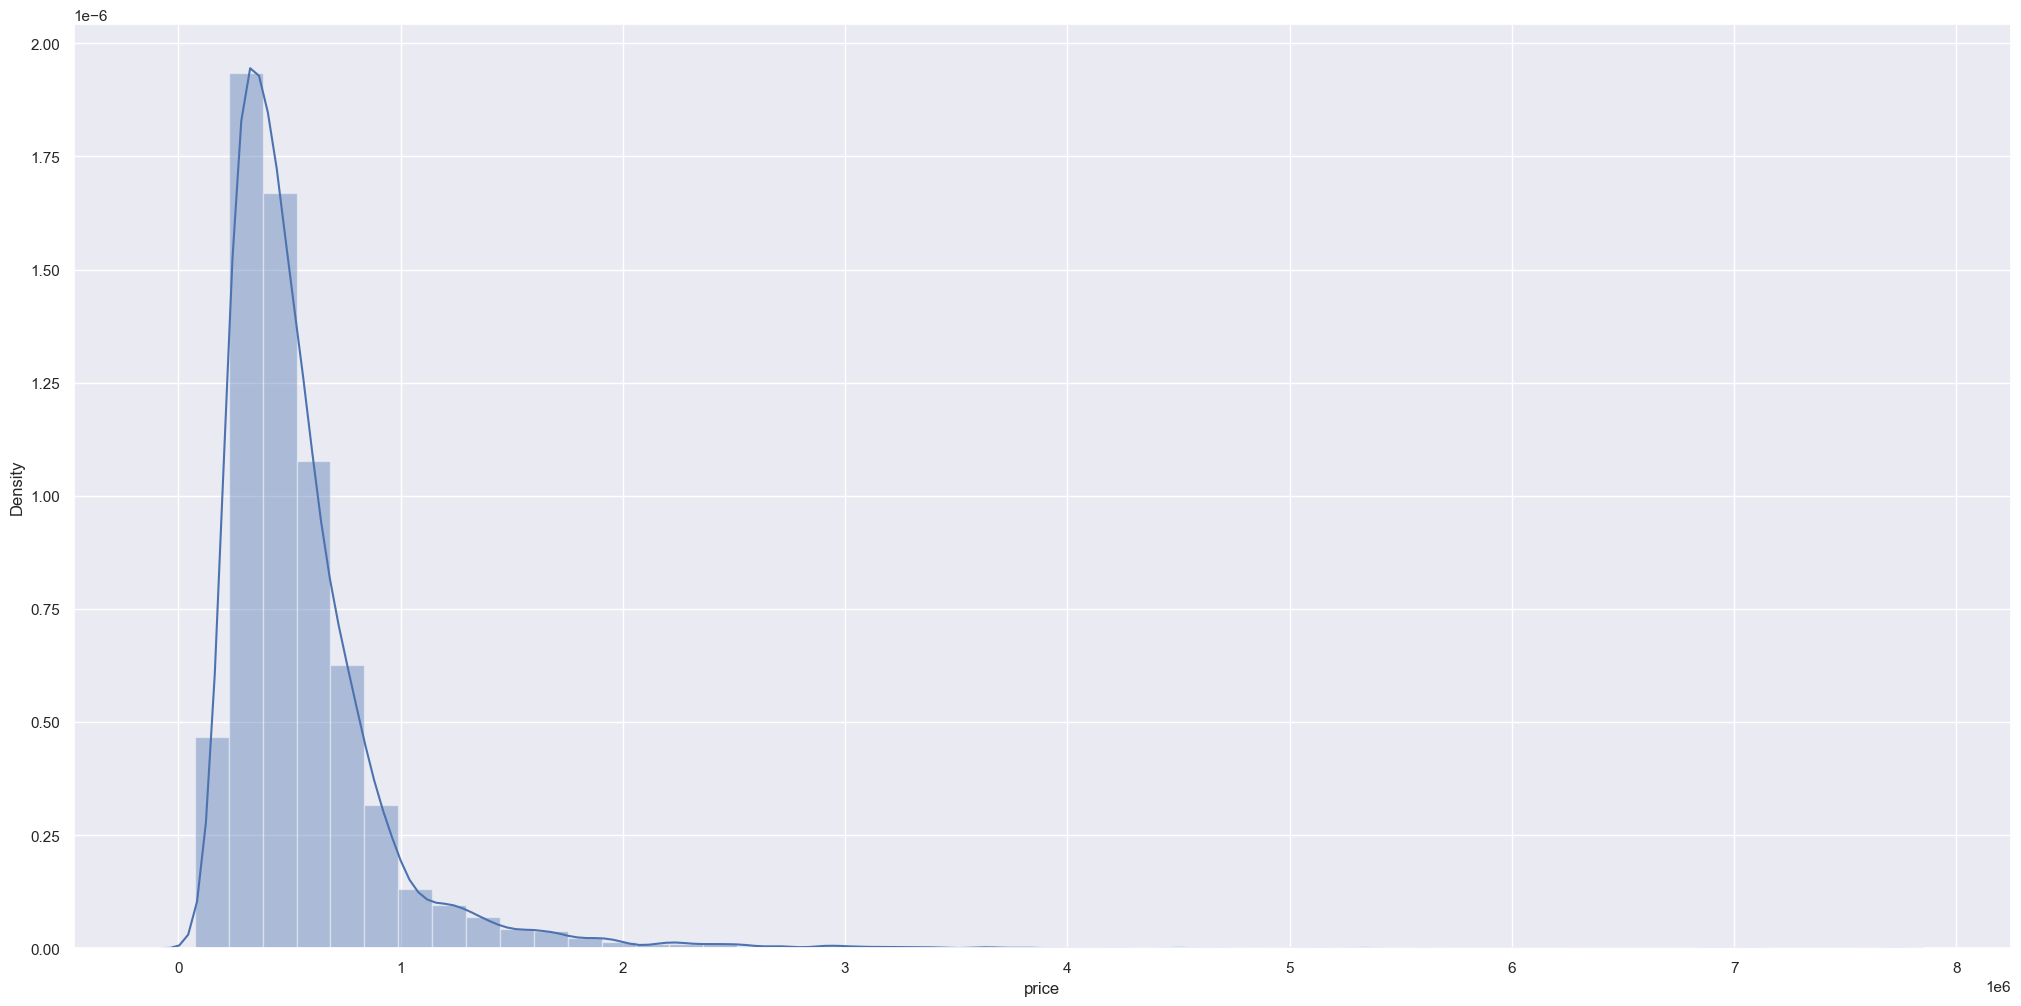

In [20]:
# Price attribute dispersion

# Age attribute dispersion

sns.distplot(df1['price'])

## Categorical Attibutes:

In [21]:
cat_attributes.apply( lambda x: x.unique().shape[0] )

Series([], dtype: float64)

In [22]:
df1['date'].min()

Timestamp('2014-05-02 00:00:00')

In [23]:
df1['date'].max()

Timestamp('2015-05-27 00:00:00')

In [24]:
df1.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

# Feature engineering

In [25]:
df2 = df1.copy()

## MAPA MENTAL ''house_sales_prediction''

In [26]:
pwd

'/home/ehgeraldo/repos/Houses_Sales_Prediction/notebook'

In [27]:
cd ..

/home/ehgeraldo/repos/Houses_Sales_Prediction


In [28]:
ls -l

total 16
drwxrwxr-x 2 ehgeraldo ehgeraldo 4096 feb  6 09:55 data/
drwxrwxr-x 2 ehgeraldo ehgeraldo 4096 feb  6 09:55 images/
drwxrwxr-x 3 ehgeraldo ehgeraldo 4096 feb  8 14:53 notebook/
-rw-rw-r-- 1 ehgeraldo ehgeraldo   25 feb  6 09:54 README.md


In [29]:
cd images

/home/ehgeraldo/repos/Houses_Sales_Prediction/images


In [30]:
ls -l

total 204
-rw-rw-r-- 1 ehgeraldo ehgeraldo  51607 feb  6 09:54 images.jpeg
-rwxrwxr-x 1 ehgeraldo ehgeraldo  53156 feb  6 09:54 kc_house_predictions_ciclos.jpg*
-rwxrwxr-x 1 ehgeraldo ehgeraldo 100385 feb  6 09:54 kc_house_predictions_cogglemaps.png*


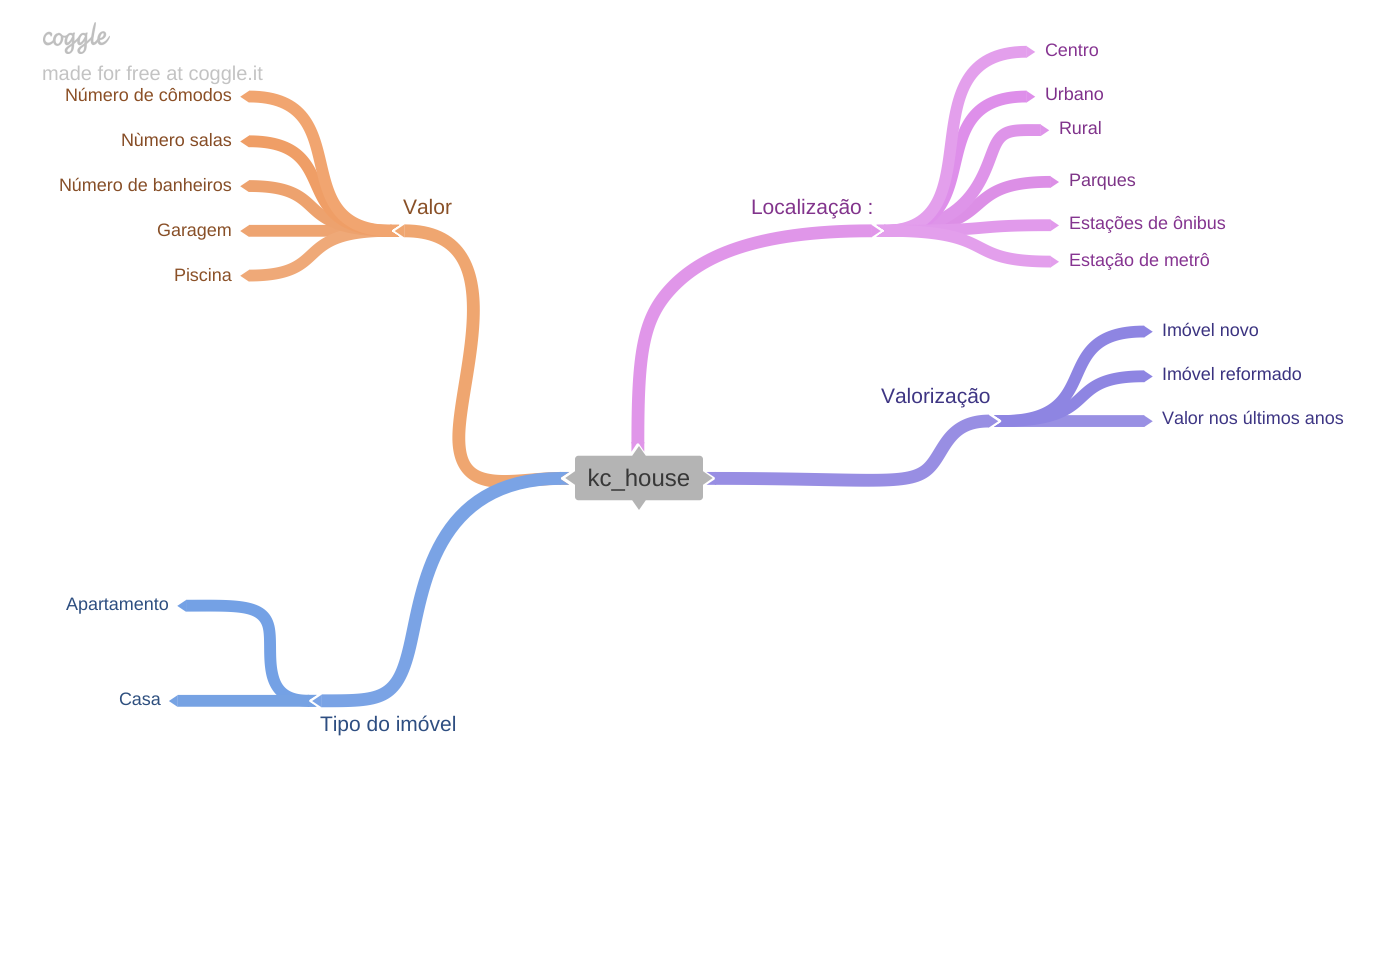

In [31]:
from IPython.display import Image

Image( 'kc_house_predictions_cogglemaps.png' )

# Create New Features

Considerando o dataset:

## 1) Imóveis nas regiões centrais da cidade têm maior valor?

## 2) Imóveis maiores têm maior valor de venda?

## 3) Imóveis com mais cômodos têm maior valor?

## 4) Imóveis menores com melhor localização são os mais procurados?

## 5) Imóveis menores e mais compactos são mais atuais e mais procurados?

In [32]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

# Time as reference to Creating New Features

In [33]:
# derivated date to date (year)

df2['year'] = df2['date'].dt.year

# derivated date to date (month)

df2['month'] = df2['date'].dt.month

# derivated date to date (day)

df2['day'] = df2['date'].dt.day

# derivated date to date (year week)
df2['year_week'] = df2['date'].dt.strftime('%Y-%W')

In [34]:
df2.head().T

0                    1                    2                    3                    4
id                      7129300520           6414100192           5631500400           2487200875           1954400510
date           2014-10-13 00:00:00  2014-12-09 00:00:00  2015-02-25 00:00:00  2014-12-09 00:00:00  2015-02-18 00:00:00
price                     221900.0             538000.0             180000.0             604000.0             510000.0
bedrooms                         3                    3                    2                    4                    3
bathrooms                      1.0                 2.25                  1.0                  3.0                  2.0
sqft_living                   1180                 2570                  770                 1960                 1680
sqft_lot                      5650                 7242                10000                 5000                 8080
floors                         1.0                  2.0                  1.0                  1.0                  1.0
waterfront                       0                    0                    0                    0                    0
view                             0                    0                    0                    0                    0
condition                        3                    3                    3                    5                    3
grade                            7                    7                    6                    7                    8
sqft_above                    1180                 2170                  770                 1050                 1680
sqft_basement                    0                  400                    0                  910                    0
yr_built                      1955                 1951                 1933                 1965                 1987
yr_renovated                     0                 1991                    0                    0                    0
zipcode                      98178                98125                98028                98136                98074
lat                        47.5112               47.721              47.7379              47.5208              47.6168
long                      -122.257             -122.319             -122.233             -122.393             -122.045
sqft_living15                 1340                 1690                 2720                 1360                 1800
sqft_lot15                    5650                 7639                 8062                 5000                 7503
year                          2014                 2014                 2015                 2014                 2015
month                           10                   12                    2                   12                    2
day                             13                    9                   25                    9                   18
year_week                  2014-41              2014-49              2015-08              2014-49              2015-07

# Handling Data

In [35]:
# 1) Quantas imóveis estão disponíveis para venda?

df2.shape

(21613, 25)

In [36]:
# 2) Quantos atributos os imóveis possuem?

df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'year_week'],
      dtype='object')

In [37]:
# 3) Quais são os atributos das casas?

df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month', 'day',
       'year_week'],
      dtype='object')

In [38]:
# 4) Qual o imóvel mais caro ( seria indicativo de maior valor de venda )?

#df2.sort_values( 'price', ascending=False)

In [39]:
# 5) Qual a soma total de quartos do conjunto de dados?

df2[ 'bedrooms' ].sum()

72854

In [40]:
# 6) Quantos imóveis possuem 2 banheiros?

df2[df2['bathrooms']==2].shape

(1930, 25)

In [41]:
# 7) Qual o preço médio de todos os imóveis no conjunto de dados?

df2[ 'price' ].mean()

540088.1417665294

In [42]:
# 8) Qual o preço médio de todos imóveis com 2 banheiros?

df2.loc[ df2[ 'bathrooms' ]== 2, 'price' ].mean()

457889.7186528497

In [43]:
# 9) Qual o preço mínimo entre todos os imóves com 3 quartos?

df2.loc[df2['bedrooms'] == 3,'price'].min()

82000.0

In [44]:
# 10) Quantas imóveis possuem mais de 300 metros quadrados na sala de estar?

df2[ 'm2_living' ] = None

df2[ 'm2_living' ] = df2[ 'sqft_living' ] * 0.092 

df2[ df2[ 'm2_living'] > 300 ].shape

(2141, 26)

In [45]:
# 11) Quantos imóveis tem mais de 2 andares?

df2[ df2[ 'floors' ] > 2 ].shape

(782, 26)

In [46]:
# 12) Quantos imóveis possuem vista para o mar?

df2[df2['waterfront'] == 1].shape

(163, 26)

In [47]:
# 13) Dos imóveis com vista para o mar, quantoss tem 3 quartos?

df2[ (df2['waterfront']==1) & (df2['bedrooms']==3)].shape

(64, 26)

In [48]:
# 14) Das casas com mais de 300 metros quadrados de sala de estar, quantas tem mais de 2 banheiros?

df2[( df2[ 'm2_living' ] > 300 ) & ( df2[ 'bathrooms' ] > 2 ) ].shape 

(2088, 26)

In [49]:
# 15) Qual a data do imóvel mais antigo no portfólio?

#df2.sort_value('date', ascending='True')

In [50]:
# 16) Quantos imóveis possuem o número máximo de andares (3.5)?

df2[df2['floors']==3.5].shape

(8, 26)

In [51]:
# 17) Criar uma classificação para os imóveis, separando-os em baixo e alto padrão de acordo com o preço.

## Acima de 540.000 = alto padrão 
## Abaixo de 540.00 = baixo padrão

df2[ 'classification' ] = None

df2.loc[df2['price'] > 540000, 'classification'] ='high-level'
df2.loc[df2['price'] < 540000, 'classification'] ='low-level'

In [52]:
df2['classification'].value_counts()

low-level     13616
high-level     7919
Name: classification, dtype: int64

In [113]:
# 18) Criar um mapa indicando onde as casas estão localizadas geograficamente

df_mapa = df2[[ 'id', 'lat', 'long', 'price' ]]

df_mapa

mapa = px.scatter_mapbox( df_mapa, lat='lat', lon='long',
                        hover_name='id',
                        hover_data=['price'],
                        color_discrete_sequence=[ 'red' ],
                        zoom=3,
                        height=300 )

mapa.update_layout( mapbox_style='open_street-map' )
mapa.update_layout( height=600, margin={'r':0, 't':0, 'l':0, 'b':0 } )
mapa.show()

In [54]:
# 19) Crie uma nova coluna chamada: "house_age" ==
#   ◦ Se o valor da coluna "date" for maior que 2014-01-01 => 'new_house 
#   ◦ Se o valor da coluna "date" for menor que 2014-01-01 => 'old_house 


df2['house_age']= None

df2.loc[df2['date'] > '2014-01-01','house_age'] = 'new_house'

df2.loc[df2['date'] < '2014-01-01','house_age'] = 'old_house'

In [55]:
df2['house_age'].value_counts()

new_house    21613
Name: house_age, dtype: int64

In [56]:
# 20. Crie uma nova coluna chamada: "dormitory_type"
#    ◦ Se o valor da coluna "bedrooms" for igual à 1 => 'studio' 
#    ◦ Se o valor da coluna "bedrooms" for igual à 2 => 'apartament'


df2['dormitory_type'] = None

df2.loc[df2['bedrooms'] == 1, 'dormitory_type'] = 'studio'

df2.loc[df2['bedrooms'] == 2, 'dormitory_type'] = 'apartament'

df2.loc[df2['bedrooms'] > 2,  'dormitory_type'] = 'house'

In [57]:
df2['dormitory_type'].value_counts()

house         18641
apartament     2760
studio          199
Name: dormitory_type, dtype: int64

In [58]:
# 21. Crie uma nova coluna chamada: "condition_type"

# -  Se o valor da coluna "condition" for menor ou igual à 2 => 'bad' 
# -  Se o valor da coluna "condition" for igual à 3 ou 4 => 'regular' 
# -  Se o valor da coluna "condition" for igual à 5 => 'good' 

df2['condition_type']=None

df2.loc[ ( df2[ 'condition' ] <= 2 ), 'condition_type' ] = 'bad' 

df2.loc[ ( ( df2[ 'condition' ] == 3 ) | ( df2[ 'condition' ] == 4 ) ), 'condition_type' ] = 'regular'

df2.loc[ ( df2[ 'condition' ] == 5 ), 'condition_type' ] = 'good'


In [59]:
df2['condition_type'].value_counts()

regular    19710
good        1701
bad          202
Name: condition_type, dtype: int64

In [60]:
# 22) Modifique o TIPO da coluna "condition" para STRING

df2['condition'].dtype

dtype('int64')

In [61]:
df2['condition'] = df2['condition'].astype(str)

In [62]:
df2['condition'].dtypes

dtype('O')

In [63]:
# 23) Delete as colunas "sqft_living15" e "sqft_lot15"

df2.drop( 'sqft_living15', axis=1, inplace=True)

In [64]:
df2.drop( 'sqft_lot15', axis=1, inplace=True)

In [65]:
# 24) Modifique o TIPO da coluna "yr_built" para DATE

df2['yr_built'].dtypes

dtype('int64')

In [66]:
df2['yr_built'] = pd.to_datetime(df2['yr_built'], format='%Y', errors='coerce' )
# errors= 'coerce' converte ausência de valores em NaT (Not a Time).)

In [67]:
df2['yr_built'].dtypes

dtype('<M8[ns]')

In [68]:
df2['yr_built'].head()

0   1955-01-01
1   1951-01-01
2   1933-01-01
3   1965-01-01
4   1987-01-01
Name: yr_built, dtype: datetime64[ns]

In [70]:
# 24) Qual a data mais antiga de construção de um imóvel?

#df2.sort_values('yr_built', ascending=True)

Timestamp('1900-01-01 00:00:00')

In [99]:
df2['yr_built'].min()

Timestamp('1900-01-01 00:00:00')

In [71]:
df2['yr_built'].max()

Timestamp('2015-01-01 00:00:00')

In [73]:
# 25) Quantos imóveis tem 2 andares?

df2['floors'].shape

(21613,)

In [76]:
# 26) Quantos imóveis estão com a condição igual à "regular"?

df2.loc[df2['condition_type'] =='regular', 'condition_type' ].value_counts()

regular    19710
Name: condition_type, dtype: int64

In [78]:
# 27) Quantos imóveis estão com a condição igual a "bad" e possuem "vista para água"?

df2.loc[ (df2['condition_type']=='bad') & (df2['waterfront']==1), 'condition_type'].value_counts()

bad    2
Name: condition_type, dtype: int64

In [82]:
# 28) Quantos imóveis estão com a condição igual a "good" e são "new_house"?

good    1701
Name: condition_type, dtype: int64

In [79]:
df2.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'year', 'month', 'day', 'year_week', 'm2_living',
       'classification', 'house_age', 'dormitory_type', 'condition_type'],
      dtype='object')

In [80]:
df2.head()

id       date     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view condition  grade  sqft_above  sqft_basement   yr_built  yr_renovated  zipcode      lat     long  year  month  day year_week  m2_living classification  house_age dormitory_type condition_type
0  7129300520 2014-10-13  221900.0         3       1.00         1180      5650     1.0           0     0         3      7        1180              0 1955-01-01             0    98178  47.5112 -122.257  2014     10   13   2014-41     108.56      low-level  new_house          house        regular
1  6414100192 2014-12-09  538000.0         3       2.25         2570      7242     2.0           0     0         3      7        2170            400 1951-01-01          1991    98125  47.7210 -122.319  2014     12    9   2014-49     236.44      low-level  new_house          house        regular
2  5631500400 2015-02-25  180000.0         2       1.00          770     10000     1.0           0     0         3      6         770              0 1933-01-01             0    98028  47.7379 -122.233  2015      2   25   2015-08      70.84      low-level  new_house     apartament        regular
3  2487200875 2014-12-09  604000.0         4       3.00         1960      5000     1.0           0     0         5      7        1050            910 1965-01-01             0    98136  47.5208 -122.393  2014     12    9   2014-49     180.32     high-level  new_house          house           good
4  1954400510 2015-02-18  510000.0         3       2.00         1680      8080     1.0           0     0         3      8        1680              0 1987-01-01             0    98074  47.6168 -122.045  2015      2   18   2015-07     154.56      low-level  new_house          house        regular

In [83]:
df2.loc[( df2['condition_type'] == 'good' ) & (df2['house_age']=='new_house'), 'condition_type'].value_counts()

good    1701
Name: condition_type, dtype: int64

In [84]:
# 29) Qual o valor do imóvel mais caro do tipo "studio"?

df2.loc[df2['dormitory_type'] == 'studio', 'price'].max()

1247000.0

In [86]:
# 30) Quantos imóveis do tipo "apartament" foram reformados em 2015?

df2.loc[( df2['dormitory_type']=='apartament' ) & (df2['yr_renovated']=='2015-01-01'), 'id' ].count()

0

In [87]:
# 31) Qual o maior número de quartos que um imóvel do tipo "house" possui?

df2.loc[ df2['dormitory_type']=='house','bedrooms' ].max()

33

In [89]:
# 32) Quandos imóveis "new_house" foram reformados no ano de 2014?

df2.loc[( df2['house_age']=='new_house' ) & (df2['yr_renovated']=='2014-01-01'),'id'].count()

0

In [93]:
# 33) Selecione as colunas: 
# "id = 0", "date = 1", "price = 2", "floors" = 7, "zipcode = 16" 
# pelo método:

#   ◦ Direto pelo nome das colunas
#   ◦ Pelos índices
#   ◦ Pelos índices das linhas e o nome das colunas
#  ◦ Índices booleanos

column = [ 'id', 'date', 'price', 'floors', 'zipcode' ]
columnsnum = []

for i, col in enumerate( df2.columns.to_list() ):
    if col in column:
        columnsnum.append( i )
        
print( df2.iloc[ 0:20, columnsnum ] )
print( '-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=' )

print( df2.loc[ 0:20, column ] ) 
print( '-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=' )
columns = []
for i, col in enumerate( df2.columns.to_list() ):
    if col in column:
        columns.append( True )
    else:
        columns.append( False )
print( df2.loc[ 0:20, columns ] )

            id       date      price  floors  zipcode
0   7129300520 2014-10-13   221900.0     1.0    98178
1   6414100192 2014-12-09   538000.0     2.0    98125
2   5631500400 2015-02-25   180000.0     1.0    98028
3   2487200875 2014-12-09   604000.0     1.0    98136
4   1954400510 2015-02-18   510000.0     1.0    98074
5   7237550310 2014-05-12  1225000.0     1.0    98053
6   1321400060 2014-06-27   257500.0     2.0    98003
7   2008000270 2015-01-15   291850.0     1.0    98198
8   2414600126 2015-04-15   229500.0     1.0    98146
9   3793500160 2015-03-12   323000.0     2.0    98038
10  1736800520 2015-04-03   662500.0     1.0    98007
11  9212900260 2014-05-27   468000.0     1.0    98115
12   114101516 2014-05-28   310000.0     1.5    98028
13  6054650070 2014-10-07   400000.0     1.0    98074
14  1175000570 2015-03-12   530000.0     1.5    98107
15  9297300055 2015-01-24   650000.0     2.0    98126
16  1875500060 2014-07-31   395000.0     2.0    98019
17  6865200140 2014-05-29   

In [95]:
# 34) Salve um arquivo .csv com somente as colunas do item 10 e 17 ?

columns = []
for i, col in enumerate( df2.columns.to_list() ):
    if 10 < i <= 17:
        columns.append( True )
    else:
        columns.append( False )
        
new_df = df2.loc[:, columns ]

new_df.to_csv( 'kc_house_data.csv', index=False )

In [96]:
# 35) Modifique a cor dos pontos no mapa de "pink" para "verde-escuro"


# Variáveis que serão base do gráfico.
df_map = df2[[ 'id', 'lat', 'long', 'price', 'condition', 'date' ]]

mapa = px.scatter_mapbox( df_map, lat='lat', lon='long',
                        hover_name='id',
                        hover_data=['price'],
                        color='condition',
                        color_continuous_scale=px.colors.sequential.Viridis,
                        zoom=9,
                        size='price',
                        size_max=15 )

mapa.update_layout( mapbox_style='open-street-map', margin={'l': 0, 't': 0, 'r': 0, 'b':0 } )
mapa.show()